In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.rcParams['figure.figsize']=(20,10)

In [22]:
#imported the data set of banglore house price data set 

df=pd.read_csv("C://Users//Acer//Downloads//archive (17)//Bengaluru_House_Data.csv")
df.head()
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [24]:
df
df.shape

(13320, 9)

In [31]:

df1=df.groupby('area_type')['area_type'].agg('count')
df1
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [35]:
df2=df.drop(['availability','society','area_type','balcony'],axis=1)   #removed unwanted column data 
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


starting data cleaning processes



In [36]:
#checking the null values

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [38]:
# dropping the rows which have the null values 

df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [40]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [41]:
#calling the size column which has the varients of datas 

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [45]:
#using apply function to split the data 

df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4852\1793416832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [46]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [48]:
df3[df3['bhk']>25]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [52]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [54]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [56]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [57]:
def convert_sqft_to_float(x):
    tokens=x.split('-')
    if (tokens==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [61]:
df4=df3.copy()
df4['sqrft']=df['total_sqft'].apply(convert_sqft_to_float)
df4.head()

,location,size,total_sqft,bath,price,bhk,sqrft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [64]:
df4.iloc[5]

location      Whitefield
size               2 BHK
total_sqft          1170
bath                 2.0
price               38.0
bhk                    2
sqrft             1170.0
Name: 5, dtype: object

In [71]:
df4.head()

,location,size,bath,price,bhk,sqrft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0


In [75]:
#feature engineering 

df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['sqrft']
df5.head()

,location,size,bath,price,bhk,sqrft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [82]:
len(df5.location.unique())

1304

In [89]:
df5.location=df5.location.apply(lambda x :x.strip())
location_status=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status.head(10)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [100]:
location_lessthan_10=location_status[location_status<=10]
len(location_lessthan_10.unique())

10

In [94]:
location_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [96]:
len(df5.location.unique())

1293

In [99]:
df5.location = df5.location.apply(lambda x:'else' if x in location_lessthan_10 else x)
len(df5.location.unique())

242

In [101]:
df5.head()

,location,size,bath,price,bhk,sqrft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


outlier detection and removal 

In [102]:
df5.shape

(13246, 7)

In [105]:
df6=df5[~(df5.sqrft/df5.bhk<300)]
df6.shape

(12502, 7)

In [108]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=m+std)]
        df_out = pd.concat([df_out,reduced_df],ignore_index =True)
    return df_out

df7=remove_outlier(df6)
df7.shape

(10140, 7)

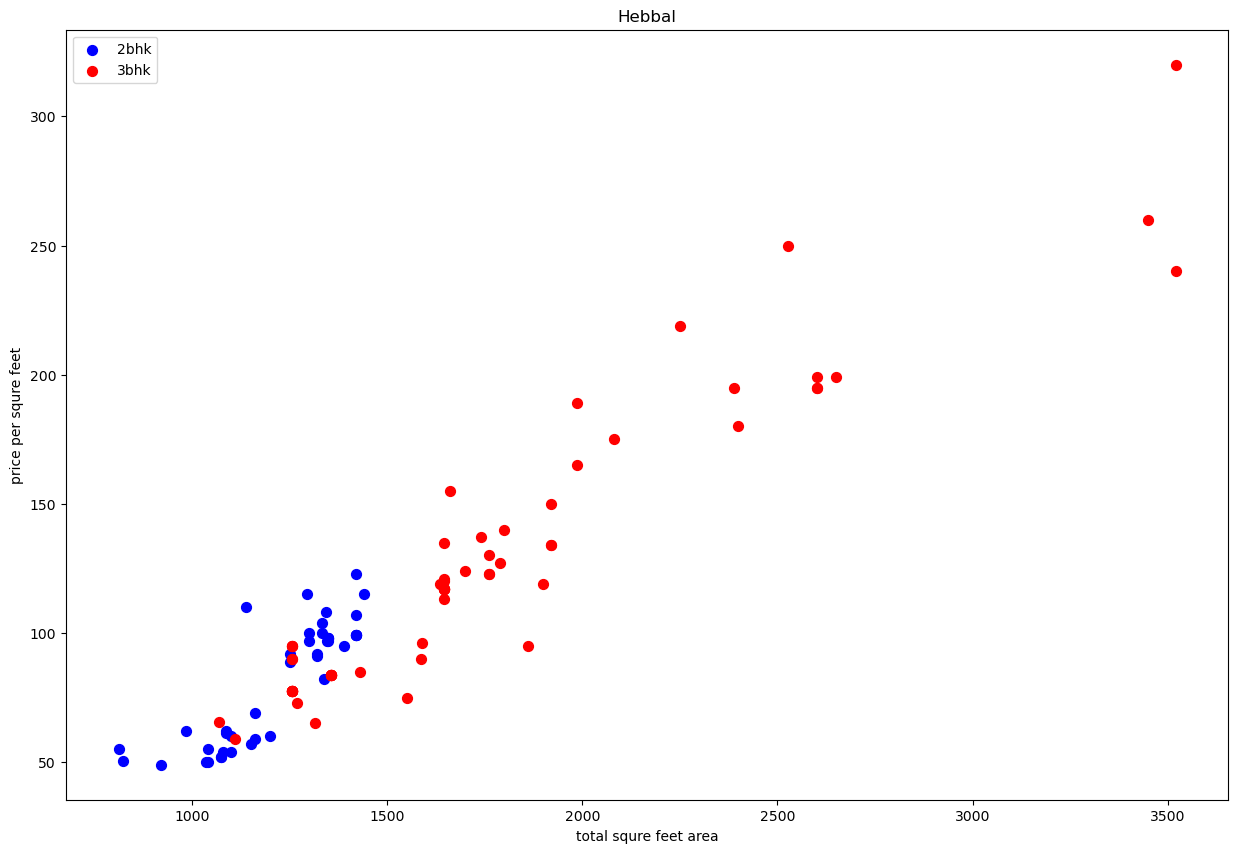

In [114]:
def plot_scatter_charts(df,location):
    bhk2 =df[(df.location==location) &(df.bhk==2)]
    bhk3 =df[(df.location==location) &(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] =(15,10)
    plt.scatter(bhk2.sqrft,bhk2.price,color='blue',label='2bhk',s=50)
    plt.scatter(bhk3.sqrft,bhk3.price,color='red',label='3bhk',s=50)
    plt.xlabel("total squre feet area")
    plt.ylabel("price per squre feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_charts(df7,"Hebbal")


In [116]:
def remove_bhk_outlier(df):
    exclude_indices =np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outlier(df7)
df8.shape

(7217, 7)

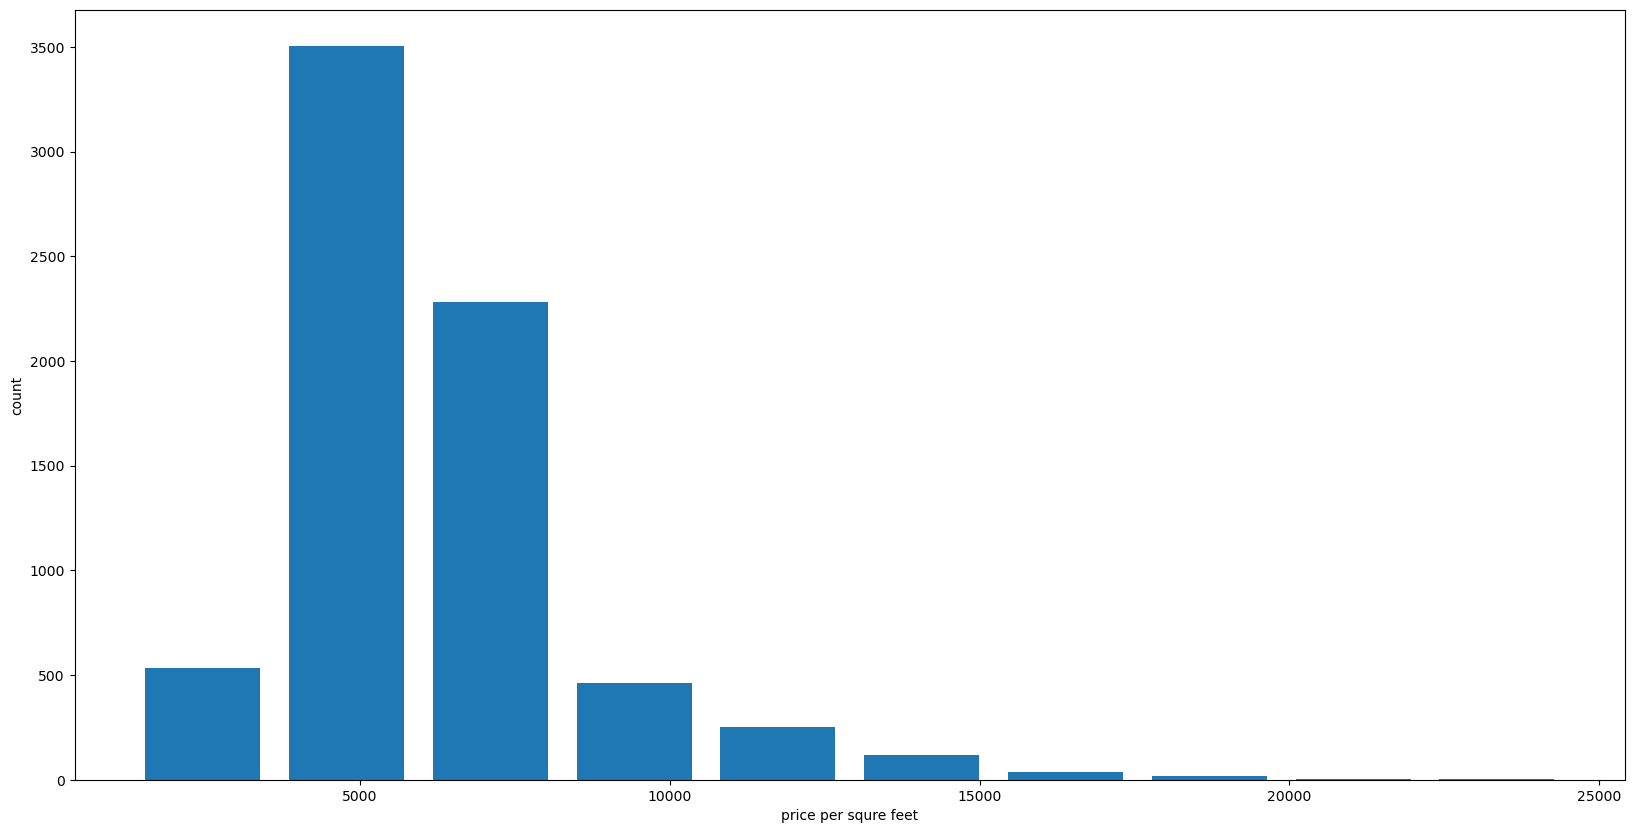

In [117]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per squre feet')
plt.ylabel('count')
plt.show()

In [118]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7144, 7)

In [119]:
df9

,location,size,bath,price,bhk,sqrft,price_per_sqft
0,1st Block Jayanagar,4 BHK,4.0,428.0,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,3.0,194.0,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,2.0,235.0,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,2.0,130.0,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,2.0,148.0,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10131,else,2 BHK,2.0,70.0,2,1200.0,5833.333333
10132,else,1 BHK,1.0,200.0,1,1800.0,11111.111111
10135,else,2 BHK,2.0,110.0,2,1353.0,8130.081301
10136,else,1 Bedroom,1.0,26.0,1,812.0,3201.970443


In [121]:
#onehot encoding 

dummies =pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,else
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df10=pd.concat([df9,dummies],axis=1)
df10.head(5)

,location,size,bath,price,bhk,sqrft,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,4.0,428.0,4,2850.0,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,3.0,194.0,3,1630.0,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,2.0,235.0,3,1875.0,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,2.0,130.0,3,1200.0,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,2.0,148.0,2,1235.0,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df11=df10.drop(['size','location'],axis=1)
df11

,bath,price,bhk,sqrft,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2.0,70.0,2,1200.0,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132,1.0,200.0,1,1800.0,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,2.0,110.0,2,1353.0,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136,1.0,26.0,1,812.0,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
target=df11['price_per_sqft']
target

0        15017.543860
1        11901.840491
2        12533.333333
3        10833.333333
4        11983.805668
             ...     
10131     5833.333333
10132    11111.111111
10135     8130.081301
10136     3201.970443
10139    11111.111111
Name: price_per_sqft, Length: 7144, dtype: float64

In [140]:

df12=df11.drop(['price_per_sqft'],axis=1)
df12

,bath,price,bhk,sqrft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,235.0,3,1875.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,130.0,3,1200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,148.0,2,1235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2.0,70.0,2,1200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132,1.0,200.0,1,1800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,2.0,110.0,2,1353.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136,1.0,26.0,1,812.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
y=df12['price']
y

df13=df12.drop(['price'],axis=1)
df13

,bath,bhk,sqrft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,2.0,2,1200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10132,1.0,1,1800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10135,2.0,2,1353.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10136,1.0,1,812.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#used for training and test split 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df13,y,test_size=0.2,random_state=10)

In [147]:
#creating a model

from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [148]:
model.score(x_test,y_test)

0.8046858769913487

In [149]:
#using kfold cross validation to improve the model accuracy 

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),df13,y,cv=cv)

array([-9.82612315e+15,  7.73589508e-01,  8.68629818e-01,  8.50679312e-01,
        8.67827806e-01])

In [150]:
model.predict(x_test)

array([79.20837011, 38.74631471, 37.17183156, ..., 47.79941426,
       81.71767297, 70.85370117])